In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import pandas as pd
import numpy as np
import utilities as util
import datetime as dt
import whoop as wp
import levels as lv
import zero as zo
import plot as pt

# Whoop Data

In [5]:
s = wp.load_whoop_data('sandbox/data/whoop.csv')
s.head(2)

Strain  Recovery  Sleep Score   RHR  Average HR  Max HR  \
2020-03-20  13.332142      63.0         79.0  51.0          70     166   
2020-03-21  16.901529      54.0         96.0  53.0          73     176   

            Respiratory Rate  HRV (ms)  Sleep (hr)             Sleep Start  \
2020-03-20           16.9922   66.1112    7.336175 2020-03-20 03:57:37.479   
2020-03-21           16.6992   58.7386    8.661017 2020-03-21 04:02:29.286   

                         Sleep End  
2020-03-20 2020-03-20 11:42:16.639  
2020-03-21 2020-03-21 13:03:30.625

In [6]:
sleep = s.copy().drop(columns = ['RHR', 'Respiratory Rate', 'Average HR','HRV (ms)', 'Sleep Start', 'Sleep End'])
sleep.head(2)

Strain  Recovery  Sleep Score  Max HR  Sleep (hr)
2020-03-20  13.332142      63.0         79.0     166    7.336175
2020-03-21  16.901529      54.0         96.0     176    8.661017

# Levels Data

In [7]:
levels = lv.load_levels_data('sandbox/data/levels_scores.csv')
levels.head(2)

Levels Score (day)
2020-09-10                60.0
2020-09-11                58.0

# Zero Fasting Data

In [8]:
fasts = zo.load_zero_data('sandbox/data/fasts.csv')
fasts.head(2)

Date  Start    End  Hours  Night Eating
0 2020-07-26  22:52  12:26     13           NaN
1 2020-07-27  21:00  11:15     14           0.0

In [10]:
fast_stats = zo.all_fasts_stats(fasts)
fast_stats.head(2)

Fast (cumulative hours)  Fast (consecutive hours)  \
2020-07-26                 1.133333                  1.133333   
2020-07-27                15.433333                 13.566667   

           Fast Binned (consecutive hrs) Fast Binned (cumulative hrs) Fast  
2020-07-26                      0-12 hrs                     0-12 hrs   No  
2020-07-27                     13-15 hrs                    16-18 hrs  Yes

# Combine Whoop, Levels, and Fasting Data

In [12]:
all_data = util.create_metrics_dataset(sleep, levels, fast_stats)

In [13]:
all_data.head(2)

Date  Strain  Recovery  Sleep Score  Max HR  Sleep (hr)  \
0  2020-09-10   17.75      58.0         87.0     180        7.78   
1  2020-09-11    5.56      63.0         69.0     135        6.48   

   Levels Score (day)  Fast (cumulative hours)  Fast (consecutive hours)  \
0                60.0                    16.00                     17.50   
1                58.0                    12.18                     16.68   

  Fast Binned (consecutive hrs) Fast Binned (cumulative hrs) Fast  
0                     16-18 hrs                    16-18 hrs  Yes  
1                     16-18 hrs                    13-15 hrs  Yes

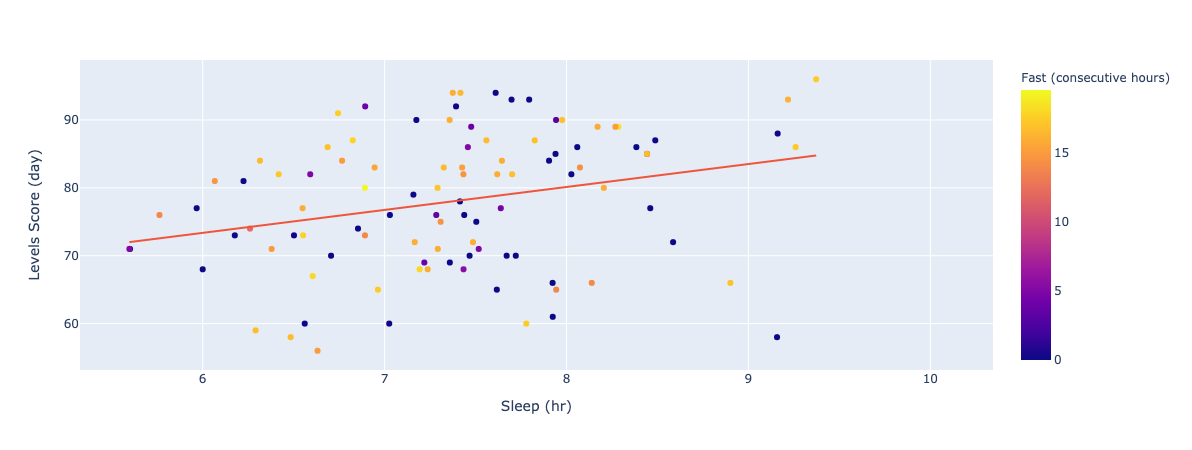

In [49]:
fig = pt.plotly_scatter(dataset=all_data, 
                        x_selection="Sleep (hr)",
                        y_selection="Levels Score (day)",
                        color_selection="Fast (consecutive hours)",
                        hover=[all_data.index]
                       )
fig.show()

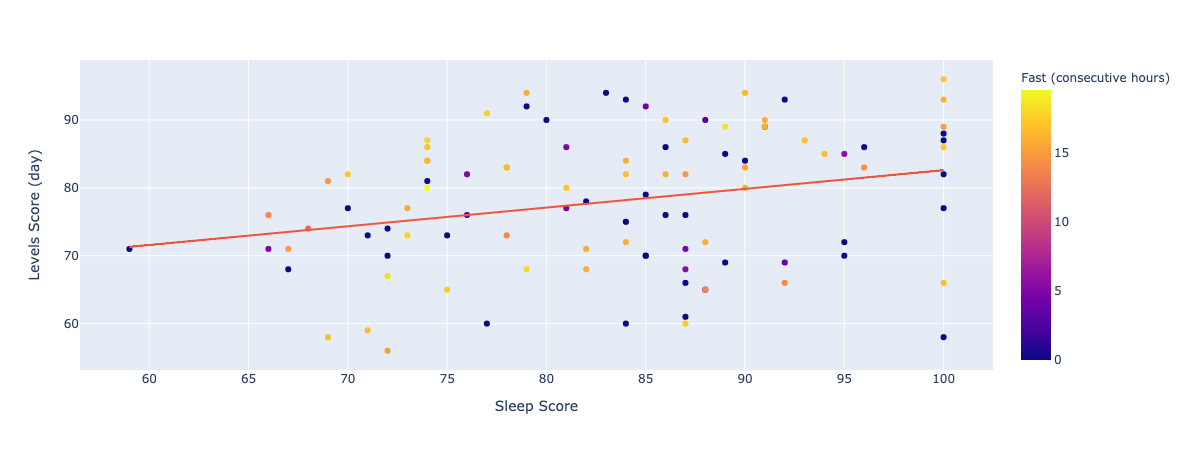

In [50]:
fig = pt.plotly_scatter(dataset=all_data, 
                        x_selection="Sleep Score",
                        y_selection="Levels Score (day)",
                        color_selection="Fast (consecutive hours)",
                        hover=[all_data.index]
                       )
fig.show()

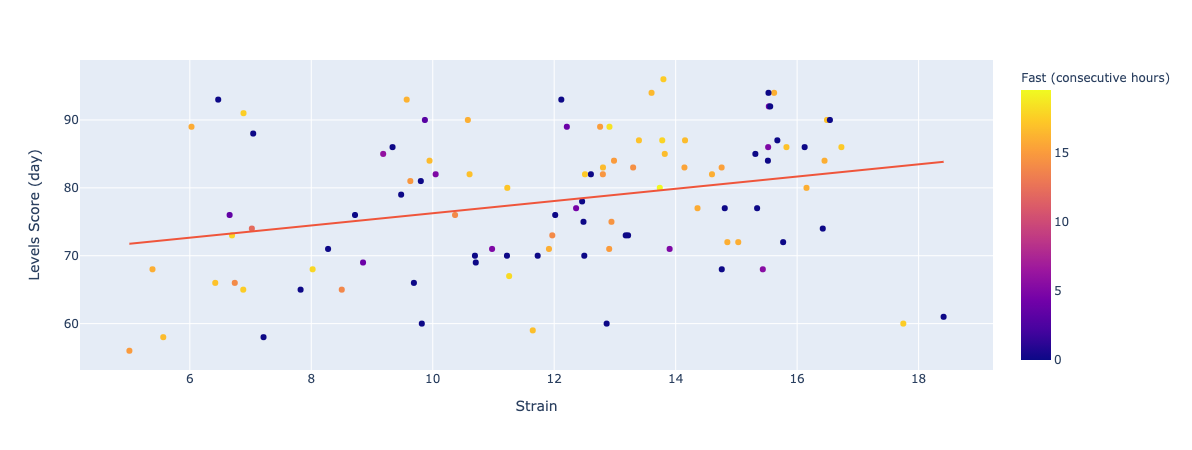

In [51]:
fig = pt.plotly_scatter(dataset=all_data, 
                        x_selection="Strain",
                        y_selection="Levels Score (day)",
                        color_selection="Fast (consecutive hours)",
                        hover=[all_data.index]
                       )
fig.show()

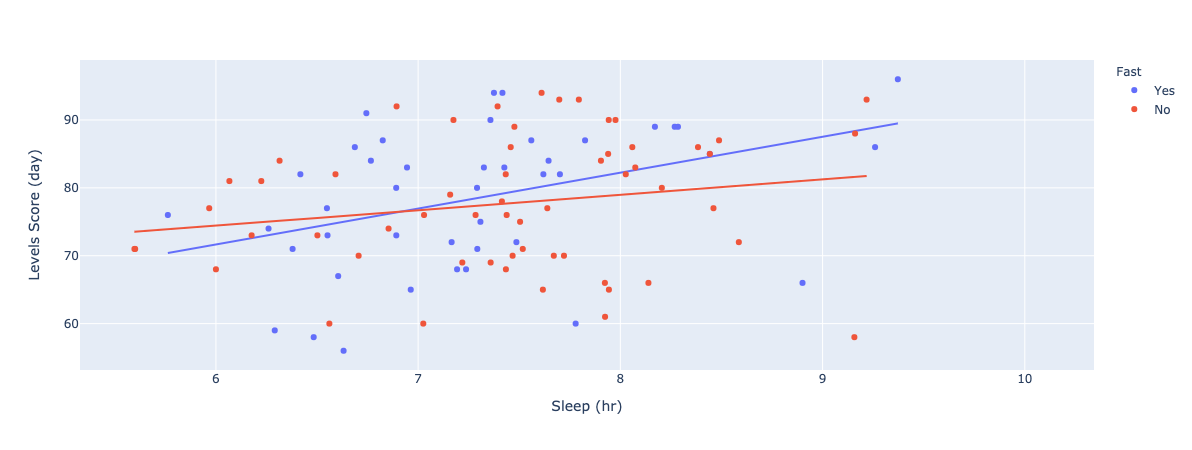

In [52]:
fig = pt.plotly_scatter(dataset=all_data, 
                        x_selection="Sleep (hr)",
                        y_selection="Levels Score (day)",
                        color_selection="Fast",
                        hover=[all_data.index]
                       )
fig.show()

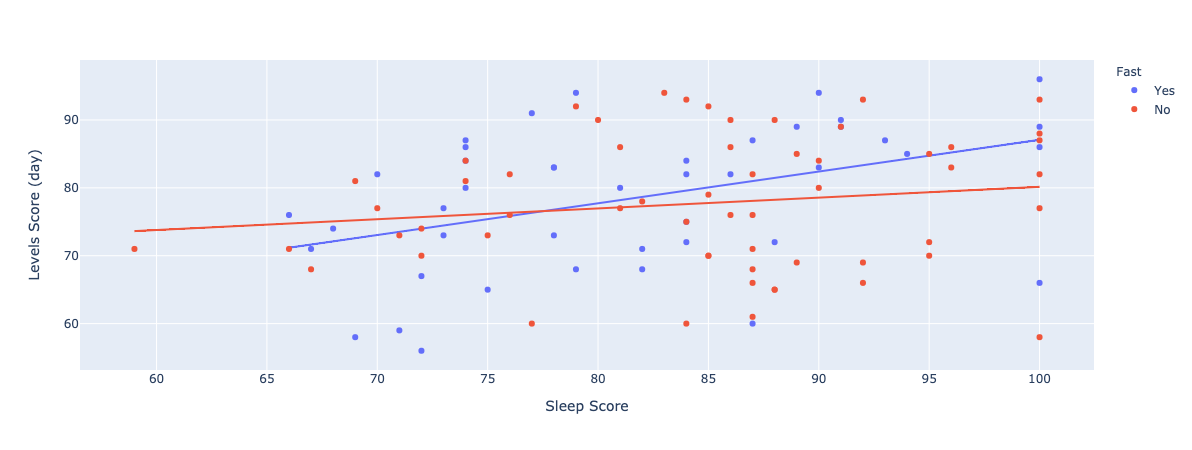

In [53]:
fig = pt.plotly_scatter(dataset=all_data, 
                        x_selection="Sleep Score",
                        y_selection="Levels Score (day)",
                        color_selection="Fast",
                        hover=[all_data.index]
                       )
fig.show()

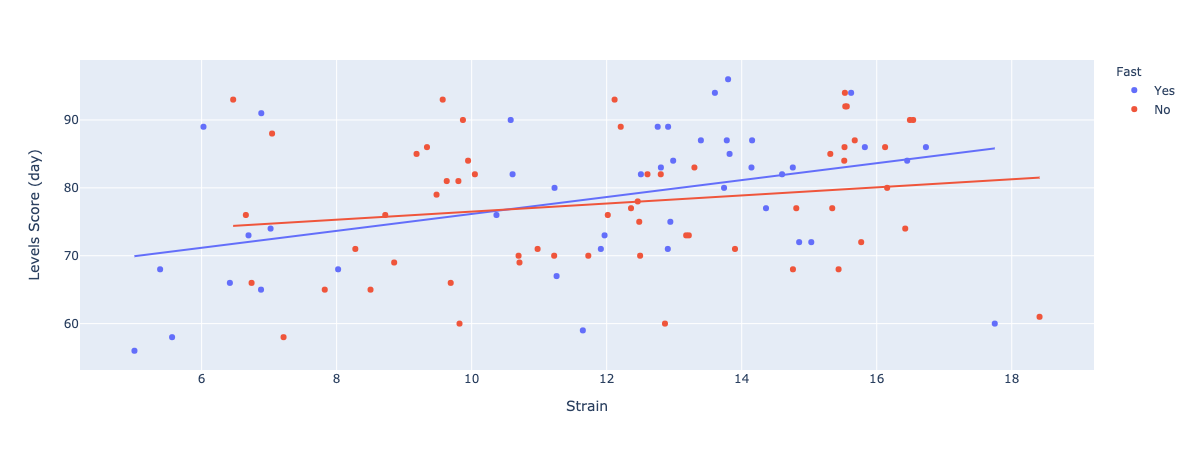

In [55]:
fig = pt.plotly_scatter(dataset=all_data, 
                        x_selection="Strain",
                        y_selection="Levels Score (day)",
                        color_selection="Fast",
                        hover=[all_data.index]
                       )
fig.show()

# Remove Outliers
Most of my exteremely low Levels scores come from days where I took on a 'glucose challenge' or had some irregular behavior. I'm, mostly, a creature of habit and care more about my typical biometrics than outlier days. With that said it's relevant to look at the outliers seperately, and this is best done with the Levels 'challenges' and 'Compare Zones' features. 

In [56]:
rm_outliers = all_data.copy()

dates = ['2020-09-10', # insufficient glucose data
         '2020-09-15', # irregular behavior 
         '2020-09-21', # glucose caliberation: banana, strawberries
         '2020-09-24', # glucose caliberation: sweet potato
         '2020-09-24', # glucose challenge: sweets
         '2020-09-28', # glucose calibration: sweet potato (cold)
         '2020-09-29', # glucose challenges: sweets
         '2020-11-01', # irregular behavior
         '2020-11-02', # irregular behavior
         '2020-11-06', # irregular behavior
         '2020-11-21', # irregular behavior
         '2020-11-25', # insufficient glucose data
         '2020-11-26', # insufficient glucose data
         '2020-11-29', # insufficient glucose data
         '2020-12-14', # irregular behavior
         '2020-12-27', # insufficient glucose data

        ]
dropped_dates = utilities.create_dates(dates = dates)

rm_outliers = rm_outliers.drop(dropped_dates)

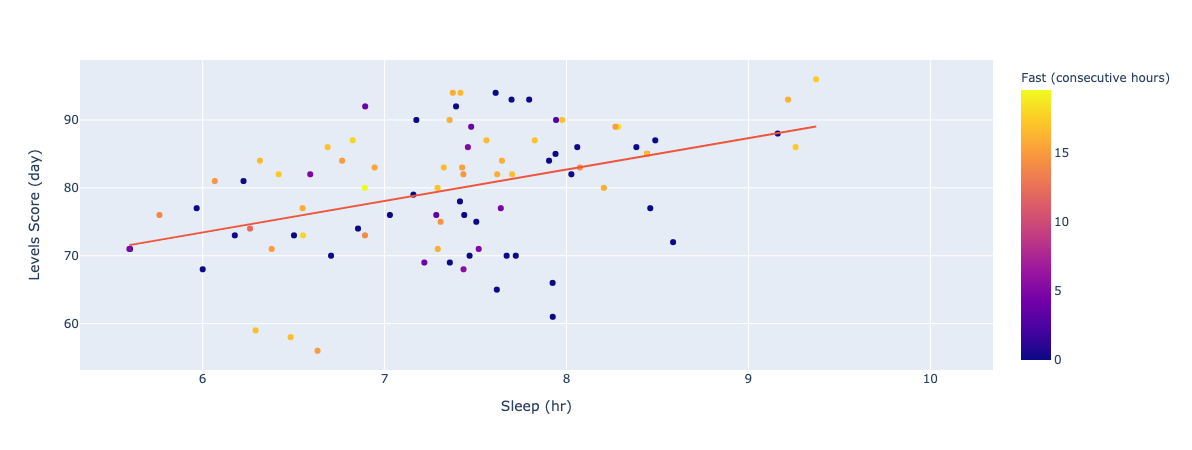

In [57]:
fig = pt.plotly_scatter(dataset=rm_outliers, 
                        x_selection="Sleep (hr)",
                        y_selection="Levels Score (day)",
                        color_selection="Fast (consecutive hours)",
                        hover=[rm_outliers.index]
                       )
fig.show()

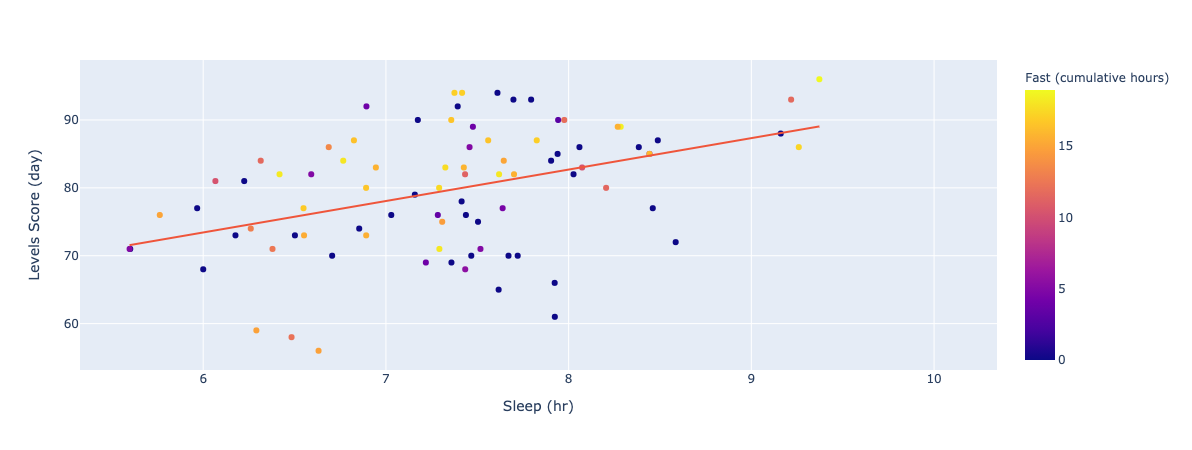

In [58]:
fig = pt.plotly_scatter(dataset=rm_outliers, 
                        x_selection="Sleep (hr)",
                        y_selection="Levels Score (day)",
                        color_selection="Fast (cumulative hours)",
                        hover=[rm_outliers.index]
                       )
fig.show()

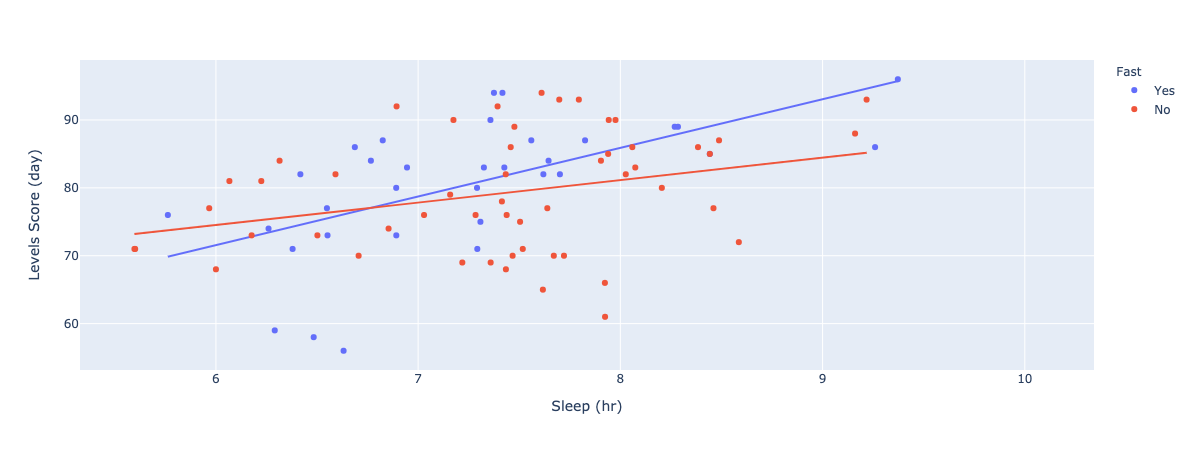

In [59]:
fig = pt.plotly_scatter(dataset=rm_outliers, 
                        x_selection="Sleep (hr)",
                        y_selection="Levels Score (day)",
                        color_selection="Fast",
                        hover=[rm_outliers.index]
                       )
fig.show()

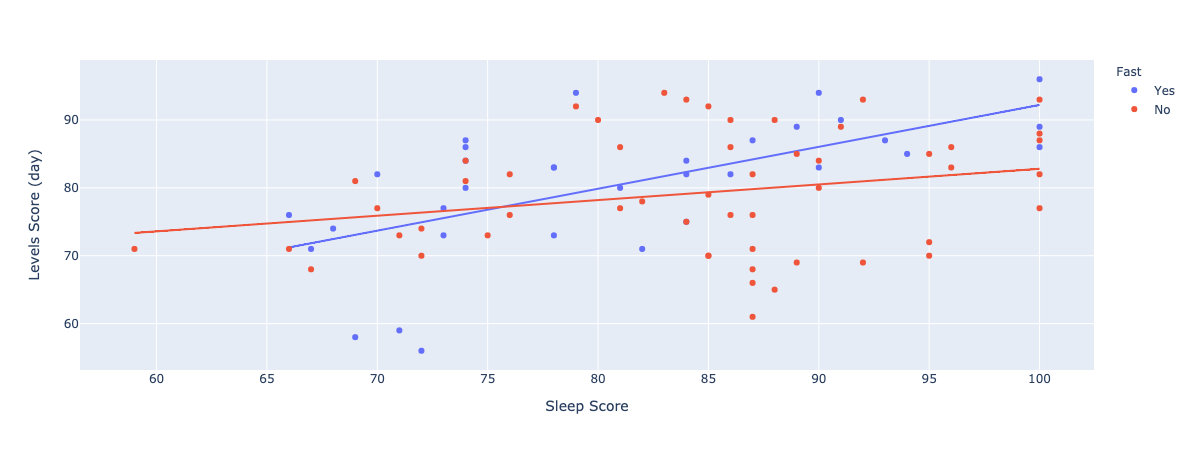

In [61]:
fig = pt.plotly_scatter(dataset=rm_outliers, 
                        x_selection="Sleep Score",
                        y_selection="Levels Score (day)",
                        color_selection="Fast",
                        hover=[rm_outliers.index]
                       )
fig.show()

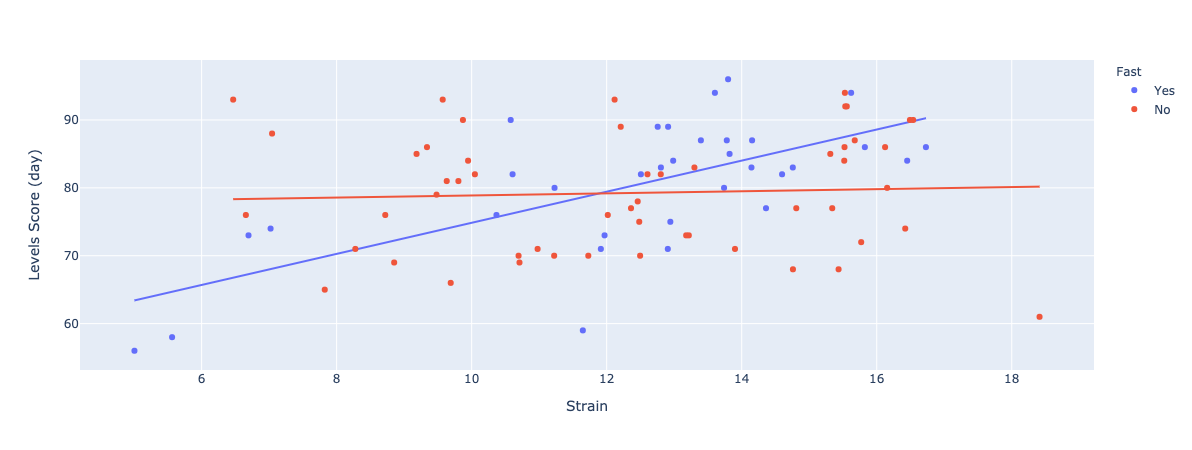

In [62]:
fig = pt.plotly_scatter(dataset=rm_outliers, 
                        x_selection="Strain",
                        y_selection="Levels Score (day)",
                        color_selection="Fast",
                        hover=[rm_outliers.index]
                       )
fig.show()

In [29]:
pr = utilities.profile_report(rm_outliers)

In [30]:
pr

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]